## Problem statement : 

Build a recommender system by using cosine simillarties score.

In [1]:
import pandas as pd
import numpy as np

In [2]:
book_df = pd.read_csv('D:/ExcelR/Data Science/Assignments related/CSV/book RS.csv',encoding = 'unicode_escape')

In [3]:
book_df.shape

(10000, 4)

In [4]:
book_df.head()

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [5]:
# Deleting unwanted columns 
del book_df['Unnamed: 0']

In [6]:
book_df.head()

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [7]:
book_df1 = book_df.rename({'User.ID': 'userid', 'Book.Title':'BookTitle', 'Book.Rating':'BookRating'}, axis=1)

In [8]:
book_df1.head()

,userid,BookTitle,BookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [9]:
book_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   userid      10000 non-null  int64 
 1   BookTitle   10000 non-null  object
 2   BookRating  10000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 234.5+ KB


In [10]:
#checking number of unique users in the dataset
len(book_df1.userid.unique())

2182

In [11]:
len(book_df1.BookTitle.unique())

9659

In [12]:
ratings_mean_count = pd.DataFrame(book_df1.groupby('BookTitle')['BookRating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(book_df1.groupby('BookTitle')['BookRating'].count())
ratings_mean_count

,BookRating,rating_counts
BookTitle,,
"Jason, Madison &amp",8.0,1
Other Stories;Merril;1985;McClelland &amp,6.0,1
Repairing PC Drives &amp,4.0,1
'48,7.0,1
'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,8.0,1
...,...,...
"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character",8.0,1
"\Well, there's your problem\: Cartoons",9.0,1
iI Paradiso Degli Orchi,7.0,1


<AxesSubplot:>

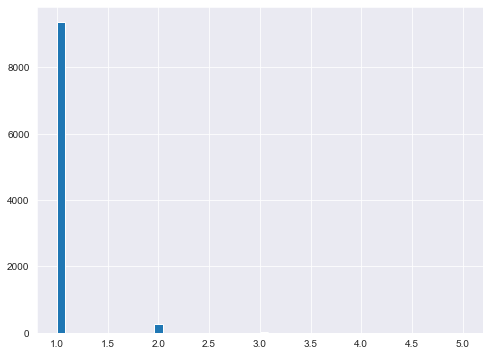

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

<AxesSubplot:>

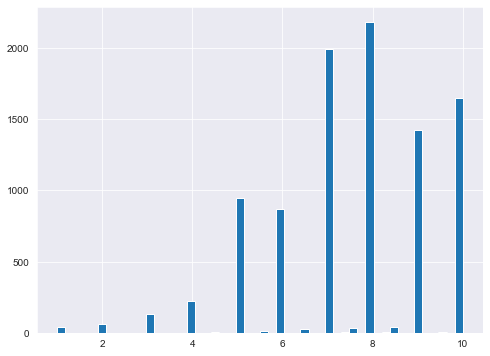

In [14]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['BookRating'].hist(bins=50)

In [15]:
user_book_df = book_df1.pivot_table(index='userid',
                                 columns='BookTitle',
                                 values='BookRating').reset_index(drop=True)

In [16]:
user_book_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Let's Set unique user-id's from original dataset as index for new created pivot matrix
user_book_df.index = book_df1.userid.unique()

In [18]:
user_book_df.index

Int64Index([276726, 276729, 276736, 276737, 276744, 276745, 276747, 276748,
            276751, 276754,
            ...
            162085, 162091, 162092, 162095, 162103, 162107, 162109, 162113,
            162121, 162129],
           dtype='int64', length=2182)

In [19]:
user_book_df.head()

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276729,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#Imputing the NaNs with 0 values
user_book_df.fillna(0, inplace=True)
user_book_df

BookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
276726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
162113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
162121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Calculating Cosine Similarity between Users

In [21]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [22]:
user_sim = 1 - pairwise_distances( user_book_df.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [23]:
#Storing the results in a dataframe
user_sim_df = pd.DataFrame(user_sim)

In [24]:
#Setting the index and column names to user ids 
user_sim_df.index = book_df1.userid.unique()
user_sim_df.columns = book_df1.userid.unique()

In [25]:
# Checking the Similarity scores for first five customers (3 & 11 are similar customers)
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [26]:
# Since Correlation with self is always 1, replacing diagonal values of correlation matrix with zeros
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [27]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:]

# 276729 & 276726 are highly similar followed by 162113 & 161453 and so on

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
           ...  
162107    276726
162109    276726
162113    161453
162121    276726
162129    276726
Length: 2182, dtype: int64

In [28]:
book_df1[(book_df1['userid']==278720) | (book_df1['userid']==278007)]

,userid,BookTitle,BookRating
1419,278007,Tangle Box,6
1420,278007,"Breath, Eyes, Memory",8
1421,278007,A Walk in the Woods: Rediscovering America on ...,8
1422,278007,The Bottoms,6
1423,278007,The Flanders Panel,7
1424,278007,Where No Gods Came (Michigan Literary Fiction ...,5
1425,278007,"The Devil in the White City : Murder, Magic, a...",6
2309,278720,A Walk in the Woods: Rediscovering America on ...,7
2310,278720,Why Not Me?: The Inside Story of the Making an...,5
2311,278720,Book,7


In [29]:
user_1=book_df1[book_df1['userid']==278720]

In [30]:
user_2=book_df1[book_df1['userid']==278007]

In [31]:
user_1.BookTitle

2309    A Walk in the Woods: Rediscovering America on ...
2310    Why Not Me?: The Inside Story of the Making an...
2311                                                 Book
Name: BookTitle, dtype: object

In [32]:
user_2.BookTitle

1419                                           Tangle Box
1420                                 Breath, Eyes, Memory
1421    A Walk in the Woods: Rediscovering America on ...
1422                                          The Bottoms
1423                                   The Flanders Panel
1424    Where No Gods Came (Michigan Literary Fiction ...
1425    The Devil in the White City : Murder, Magic, a...
Name: BookTitle, dtype: object

In id 278720 and 278007 the common book read by both is 'A Walk in the Woods: Rediscovering America on ...', they both have rated also the book, hence we recommend the other books read by them to each other

In [33]:
pd.merge(user_1,user_2,on='BookTitle',how='outer')

,userid_x,BookTitle,BookRating_x,userid_y,BookRating_y
0,278720.0,A Walk in the Woods: Rediscovering America on ...,7.0,NaN,NaN
1,278720.0,Why Not Me?: The Inside Story of the Making an...,5.0,NaN,NaN
2,278720.0,Book,7.0,NaN,NaN
3,NaN,Tangle Box,NaN,278007.0,6.0
4,NaN,"Breath, Eyes, Memory",NaN,278007.0,8.0
5,NaN,A Walk in the Woods: Rediscovering America on ...,NaN,278007.0,8.0
6,NaN,The Bottoms,NaN,278007.0,6.0
7,NaN,The Flanders Panel,NaN,278007.0,7.0
8,NaN,Where No Gods Came (Michigan Literary Fiction ...,NaN,278007.0,5.0
9,NaN,"The Devil in the White City : Murder, Magic, a...",NaN,278007.0,6.0


    Join books read by both and then we can recommend the ones which have not been read so we can recommend Tangle Box, Breath, Eyes, Memory, The Bottoms and so on to user id: 278720 and  Why Not Me?: The Inside Story of the Making an... to user id: 278007 based on above matrix